In [1]:
import pandas as pd             # data analysis
import numpy as np              # support for numerical computation
import matplotlib.pyplot as plt # graphical display
import seaborn as sns           # statistical data visualization
import plotly.express as px     # interactive visualization

In [3]:
# optional setting for pandas
pd.set_option('display.max_columns', None)

In [4]:
canada = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=20, skipfooter=2)
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


preprocessing

1. drop columns `Type`, `Coverage`, `AREA`, `REG`, `DEV`
2. add column `Total` for country wise total
3. rename columns `OdName` to `Country`, `RegName` to `Region`, `AreaName` to `Continent` and `DevName` to `Status` 

In [5]:
print(canada.columns.tolist())

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [6]:
cols_to_drops = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
canada.drop(columns=cols_to_drops, inplace=True) # inplace=True to modify the dataframe
canada.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [8]:
years = list(range(1980, 2014)) # list of years from 1980 to 2013
canada['Total'] = canada[years].sum(axis=1) # axis 1 to sum across all year columns 
canada.head(3)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [12]:
# mapper is the name of dict to map the original column names to new column names
canada.rename(mapper={
    'OdName': 'Country',
    'AreaName': 'Continent',
    'DevName': 'Status',
    'RegName': 'Region'
}, axis=1, inplace=True) # axis 1 to rename columns, mapper to rename columns from original to new name
canada.head(2)

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699


In [13]:
# since countries are unique for each record we can make it the index for the dataframe, which will help in visualization
canada.set_index('Country', inplace=True)
canada.head(3)

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


visualization
1. visualize the immigration trend for any country
2. visualize to compare any two countries for immigration trend
3. top 5 countries in the world or vice versa
4. top 5 countries in each continent or vice versa
5. top 5 countries in each region or vice versa
6. top 5 countries in each status or vice versa
7. total immigration trend for each continent

In [33]:
# query to check if a country name exists in the dataframe
canada.query('Country == "France"')

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
France,Europe,Western Europe,Developed regions,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,2177,2911,3487,3709,2759,3332,2623,2473,3214,3343,3765,3806,3463,3568,4391,4429,4002,4290,4532,5051,4646,4080,6280,5623,109091


<AxesSubplot: title={'center': 'Japan Immigration Trend'}, xlabel='Years', ylabel='Number of immigrants'>

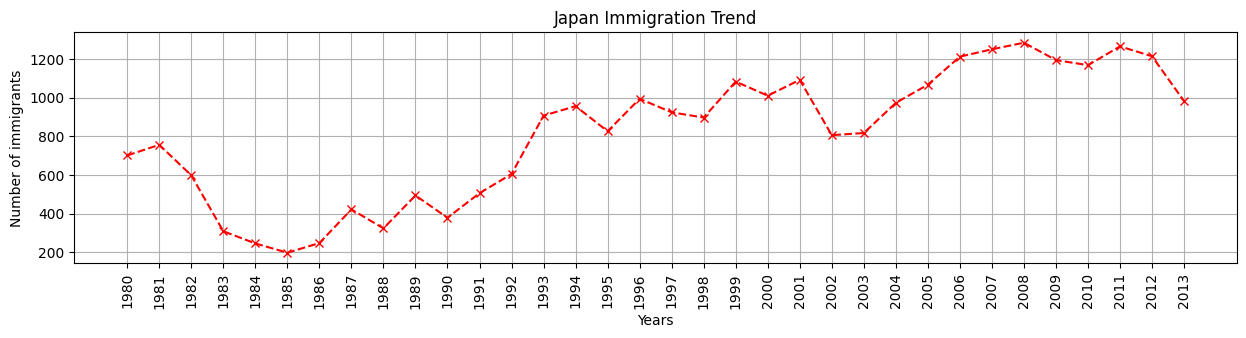

In [31]:
canada.loc['Japan', years].plot(style='rx--', figsize=(15,3), grid=True, 
                                title='Japan Immigration Trend', xlabel='Years', 
                                ylabel='Number of immigrants',
                                xticks=range(1980, 2014), rot=90)

<AxesSubplot: title={'center': 'China vs Philippines'}, xlabel='Years', ylabel='# of Immigrants'>

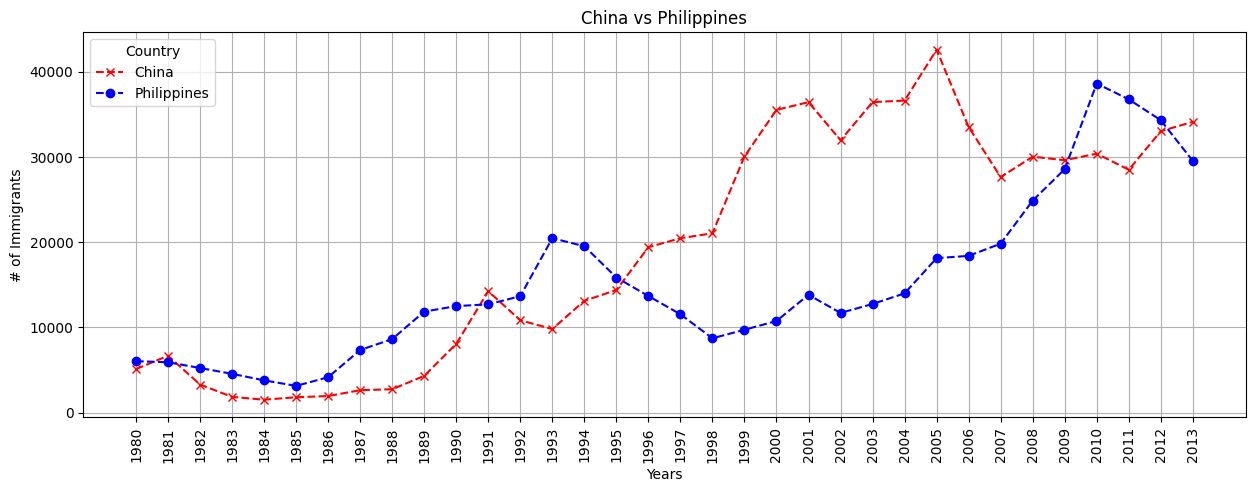

In [47]:
# compare two countries
countries = ['China','Philippines']
canada.loc[countries, years].T.plot(figsize=(15,5), grid=True,
                                    style=['rx--', 'bo--'], title='China vs Philippines',
                                    xlabel='Years', ylabel='# of Immigrants',
                                    xticks=range(1980, 2014), rot=90)

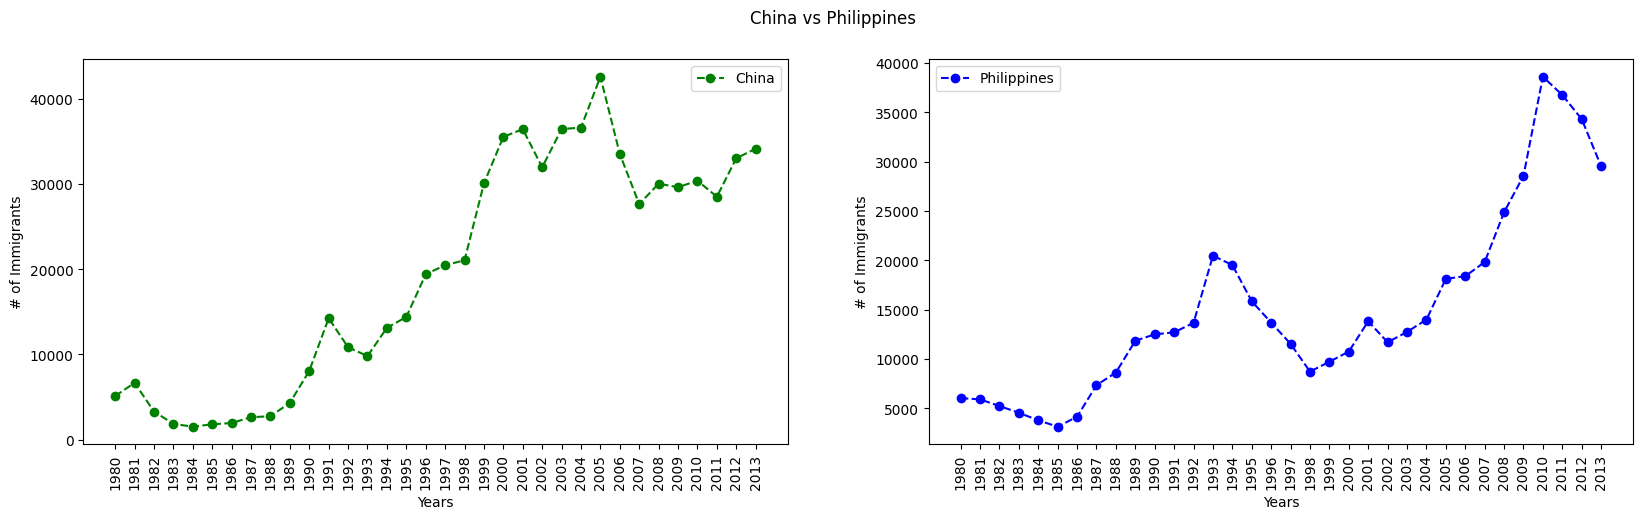

In [52]:
canada.loc[countries, years].T.plot(figsize=(20,5),
                                    style=['go--', 'bo--'], title='China vs Philippines',
                                    xlabel='Years', ylabel='# of Immigrants',
                                    xticks=range(1980, 2014), rot=90, subplots=True,
                                    layout=(1,2), sharex=True)
plt.show()

In [53]:
canada.sort_values(by='Total', ascending=False, inplace=True)
canada.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


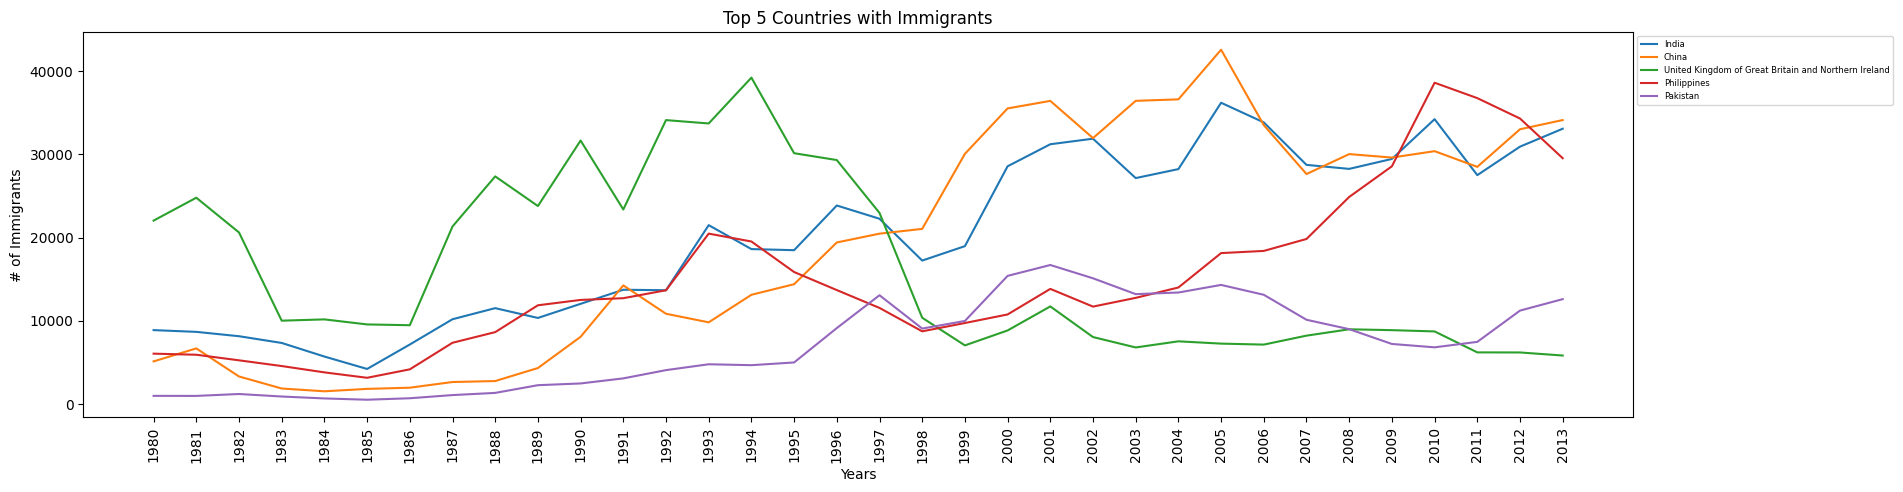

In [63]:
canada.head()[years].T.plot(figsize=(20,5),
                                    title='Top 5 Countries with Immigrants',
                                    xlabel='Years', ylabel='# of Immigrants',
                                    xticks=range(1980, 2014), rot=90)
plt.legend(bbox_to_anchor=(1, 1), fontsize=6)